## Project: Predicting Boston Housing Prices

## Description

In this project I will evaluate the performance of a model on a data collected from homes in suburbs of Boston. A model is trained using this data to predict monetary value of new instance. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.



In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

import visuals as vs

%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration

### Calculating Statistics

In [2]:
minimum_price = np.min(prices)
maximum_price = np.max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)

std_price = np.std(prices)

print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429477


### Feature Observation
 I am using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
 *   From the data we can observe a higher MEDV when there is a higher RM because more rooms would imply more space, thereby costing more, taking all other factors constant. 
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
 *   A lower MEDV can be seen when there is higher LSTAT. The area dominated by "lower class" citizens may not be conducive for young children. It may be unsafe compared to an area dominated by "upper class" citizens. Hence an area with more "lower class" citizens would result in lower demand which leads to lower prices.
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.
 *  One would expect to observe a lower MEDV when there is a higher PTRATIO.This is because there would be a lower teacher-to-student ratio resulting in less attention dedicated to each student that may impair their performance in school.In this scenario where public schools are compared to private school and the prices of houses around public schools are generally lower than those around private schools. Hence one would expect a lower price given a high student-to-teacher ratio due to a lower demand for houses in such areas.

----

## Developing a Model


### Defining a Performance Metric


In [3]:
 
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    from sklearn.metrics import r2_score
    score = r2_score(y_true,y_predict)
    return score

### Shuffling and Splitting Data


In [4]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=0)



### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. The shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

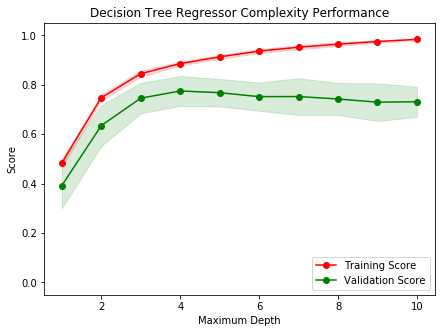

In [5]:
vs.ModelComplexity(X_train, y_train)


  *       At max_depth=1 it suffers from high bias problem and is underfitting
        
  *      As depth increases there is an increase in Traning score however there is a performance drop in validation score at depth>4.At the depth of 10 there is a huge gap in the training score and the validation score. This clearly depicts that the model was performing well over the training score but performed very poorly over the validation score. This gap in the learning curves is in itself the case of overfitting. Thus at depth 10 it suffered high variance problem

  *       At maximum depth of 4, the training score seems to plateau here, indicating the highest possible score for the model's ability to generalize to unseen data. The Gap between training score and validation score does not seem to be substantial too, indicating that the model may not be suffering from a high variance scenario


-----

## Evaluating Model Performance


### Fitting a Model


In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV


def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    regressor = DecisionTreeRegressor(random_state = 0)

    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    scoring_fnc = make_scorer(performance_metric)
    
    grid = GridSearchCV(estimator = regressor, param_grid = params, scoring=scoring_fnc, cv=cv_sets)
    
    grid = grid.fit(X, y)
    
    return grid.best_estimator_

### Optimal Model

In [7]:

reg = fit_model(X_train, y_train)

print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


The optimal max_depth is 4. It is same as we predicted from the graph where a platue is at 4 i.e., the peak of the graph where we get the optimal metrics.

### Sensitivity

In [9]:
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

In [10]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Applicability


- Relevancy: The data which the current model has been trained on, collected in 1978, is not relevant today (2016)
- Applicable: A model training on data from a city such as Boston, is not suitable to be used in urban areas such as Ohio nor would be it applicable for some other cities such as San Francisco
- Features: Although the dataset covers features which are present in today's homes, it is missing features that could affect the selling price in today's housing market such as size of a backyard or approximity to public transit if the home is in a large city.
- Robustness: The current model appears to be too sensivity/not well generalized as running it multiple times for a specific client (as seen above) provides a wide variance in pricing, which as is would be unsatifactory in the real-world
